In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import silhouette_samples, silhouette_score
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import linkage, dendrogram


In [2]:
data=pd.read_csv("mcdonalds.csv")

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
MD_x = (data.iloc[:, 0:11] == "Yes").astype(int)
result = np.round(MD_x.mean(), 2)
print(result)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
from sklearn.decomposition import PCA

In [65]:
pca_data = preprocessing.scale(MD_x)
pca = PCA(n_components=11)
pca_result = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pca_result, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.279023,-0.084464,-0.059481,-0.656129,-1.049244,0.919978,-0.540301,-0.278387,-0.677083,-0.596729,1.712062
1,-0.319850,-0.108559,-1.660863,0.098803,0.286585,-0.557607,0.635767,0.108144,0.389915,-0.049607,1.490872
2,-0.374903,2.003734,-1.264208,3.535977,0.629800,-0.145938,0.781330,-0.467696,-0.811498,-0.837512,-0.289341
3,0.074986,-1.663524,-0.351375,0.272414,0.416920,-0.729710,0.538521,-0.287015,0.280396,1.603537,-0.197283
4,-0.912852,-0.746795,0.298618,0.227840,0.411045,-1.238535,0.477936,-1.685154,-0.988442,-1.608642,-0.033817


In [44]:
print("Standard deviation :")
print(pca.explained_variance_)
print("\nProportion of variance :")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviation :
[2.60179644 1.55413053 1.40682291 1.09122511 0.88130535 0.76559699
 0.68778115 0.67031226 0.5889659  0.50179938 0.25783973]

Proportion of variance :
[0.23636416 0.14118736 0.12780497 0.09913401 0.08006353 0.06955183
 0.06248253 0.06089554 0.0535055  0.04558673 0.02342384]

Cumulative proportion of variance:
[0.23636416 0.37755152 0.50535649 0.6044905  0.68455403 0.75410586
 0.81658838 0.87748392 0.93098943 0.97657616 1.        ]


In [56]:
num_digits = 1

#the PCA results with specified digits
print(f"Standard deviations (1, ..., p= {pca.n_components_}):")
print(pca.singular_values_.round(num_digits))

print("\nRotation matrix (principal components):")
print(pca.components_.round(num_digits))

print("\nCenter (mean) of the data:")
print(pca.mean_.round(num_digits))

print("\nProportion of variance explained (1, ..., p):")
print((pca.explained_variance_ratio_ * 100).round(num_digits))

print("\nCumulative proportion of variance explained:")
print((pca.explained_variance_ratio_.cumsum() * 100).round(num_digits))


Standard deviations (1, ..., p= 11):
[61.5 47.5 45.2 39.8 35.8 33.3 31.6 31.2 29.2 27.  19.3]

Rotation matrix (principal components):
[[-0.3 -0.   0.2  0.3 -0.2 -0.3 -0.4  0.4 -0.3  0.4  0.3]
 [-0.   0.1 -0.4 -0.3 -0.3 -0.5  0.2  0.5  0.3 -0.2 -0.1]
 [-0.4  0.1 -0.5 -0.2 -0.1  0.3 -0.2 -0.3  0.3  0.2  0.4]
 [ 0.1  0.8  0.   0.3  0.2  0.   0.1  0.1  0.3  0.2  0.1]
 [-0.2  0.2  0.   0.2 -0.7  0.2  0.1 -0.2 -0.  -0.  -0.4]
 [-0.1  0.5 -0.1 -0.5  0.1 -0.1 -0.3 -0.1 -0.6 -0.1 -0.1]
 [-0.6 -0.  -0.2  0.1  0.5 -0.   0.1  0.1  0.   0.2 -0.6]
 [-0.5  0.   0.2 -0.1  0.   0.   0.6  0.  -0.2 -0.3  0.4]
 [ 0.1 -0.  -0.7  0.5  0.  -0.1  0.2 -0.1 -0.5 -0.1  0.2]
 [ 0.2 -0.1 -0.1 -0.3 -0.1  0.1  0.5  0.  -0.2  0.8 -0.1]
 [ 0.  -0.  -0.1 -0.  -0.1  0.7 -0.1  0.7 -0.1 -0.1 -0. ]]

Center (mean) of the data:
[-0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.]

Proportion of variance explained (1, ..., p):
[23.6 14.1 12.8  9.9  8.   7.   6.2  6.1  5.4  4.6  2.3]

Cumulative proportion of variance explained:
[ 

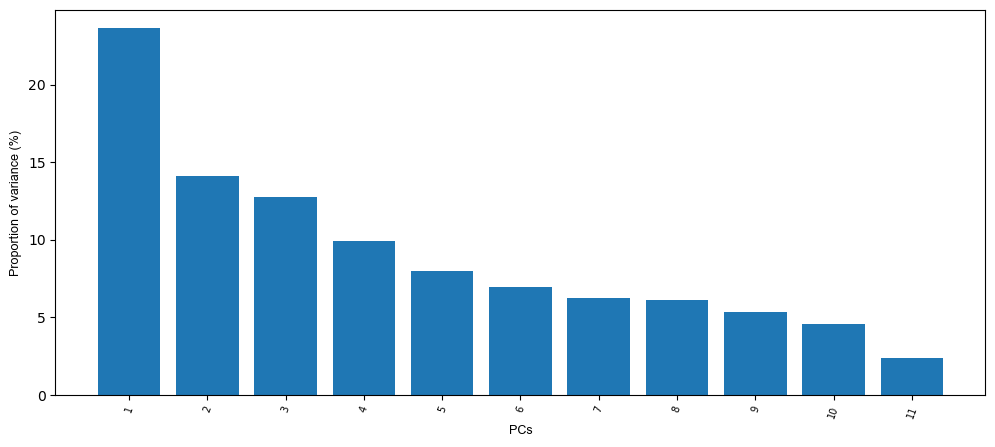

In [62]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = [""+str(i) for i in list(range(1, num_pc+1))]
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(12,5))

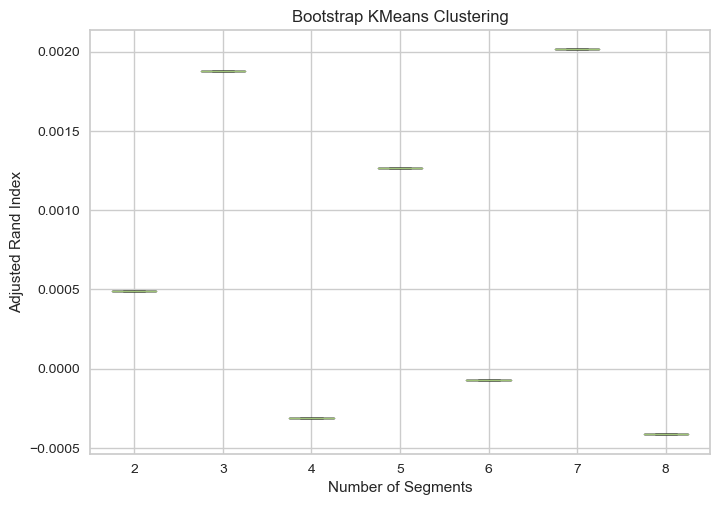

In [85]:


np.random.seed(1234)

# a function to perform bootstrapped KMeans clustering and return the adjusted Rand index
def perform_bootstrapped_kmeans(MD_x, n_clusters, nrep):
    stability_scores = []
    for _ in range(nrep):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = resample(MD_x.values, random_state=1234)

        # Perform KMeans clustering on the bootstrap sample
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        cluster_labels = kmeans.fit_predict(bootstrap_sample)

        # Calculate the adjusted Rand index
        true_labels = kmeans.predict(MD_x.values)
        rand_index = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(rand_index)

    return stability_scores

stability_scores_list = []

for n_clusters in range(2, 9):
    stability_scores = perform_bootstrapped_kmeans(MD_x, n_clusters, nrep=10)
    stability_scores_list.append(stability_scores)

# Transpose the stability_scores_list
stability_scores_array = np.array(stability_scores_list).T

plt.boxplot(stability_scores_array, labels=range(2, 9), whis=10)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap KMeans Clustering")
plt.show()

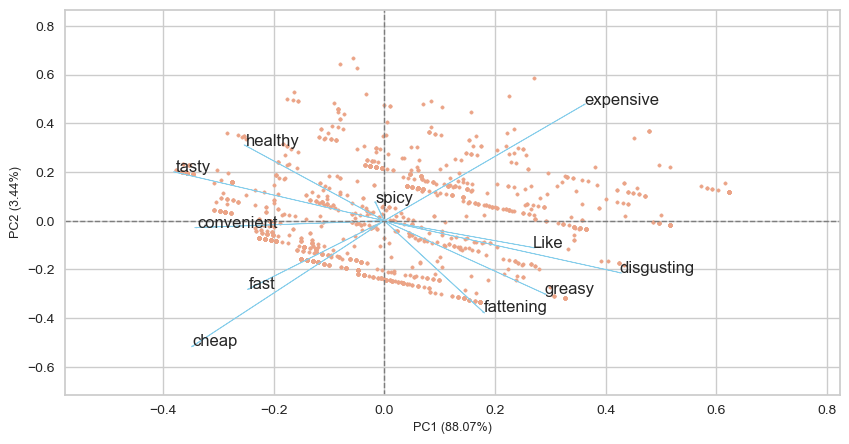

In [99]:
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=MD_x.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

C:\Users\rakhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


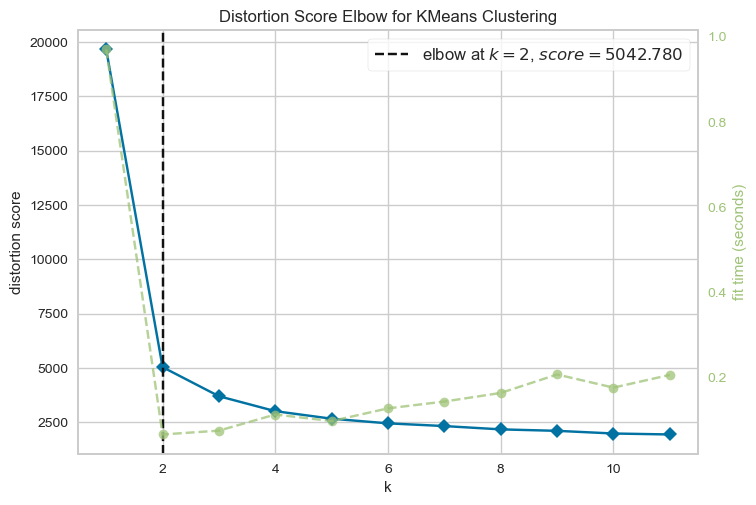

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

In [84]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
MD_x['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [2 3 3 ... 1 1 2]
WCSS: 3015.209561605513
No. of iterations:  4
Cluster centroids:  [[0.82327586 0.09698276 0.85775862 0.56465517 0.87284483 0.55603448
  0.53448276 0.40732759 0.19396552 0.37715517 8.94396552]
 [0.9753915  0.09395973 0.83221477 0.42281879 0.92393736 0.63982103
  0.86353468 0.30201342 0.26621924 0.07829978 2.61744966]
 [0.84236453 0.10344828 0.92610837 0.69950739 0.87684729 0.55665025
  0.20197044 0.42364532 0.07881773 0.53694581 6.0591133 ]
 [0.97345133 0.08259587 0.89085546 0.50737463 0.92035398 0.62831858
  0.7699115  0.32448378 0.18879056 0.10029499 0.55162242]]
Cluster size:  Counter({0: 464, 1: 447, 3: 339, 2: 203})


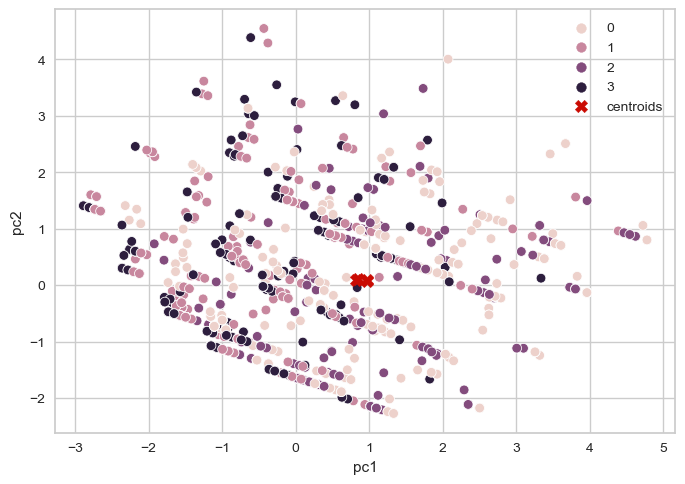

In [100]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

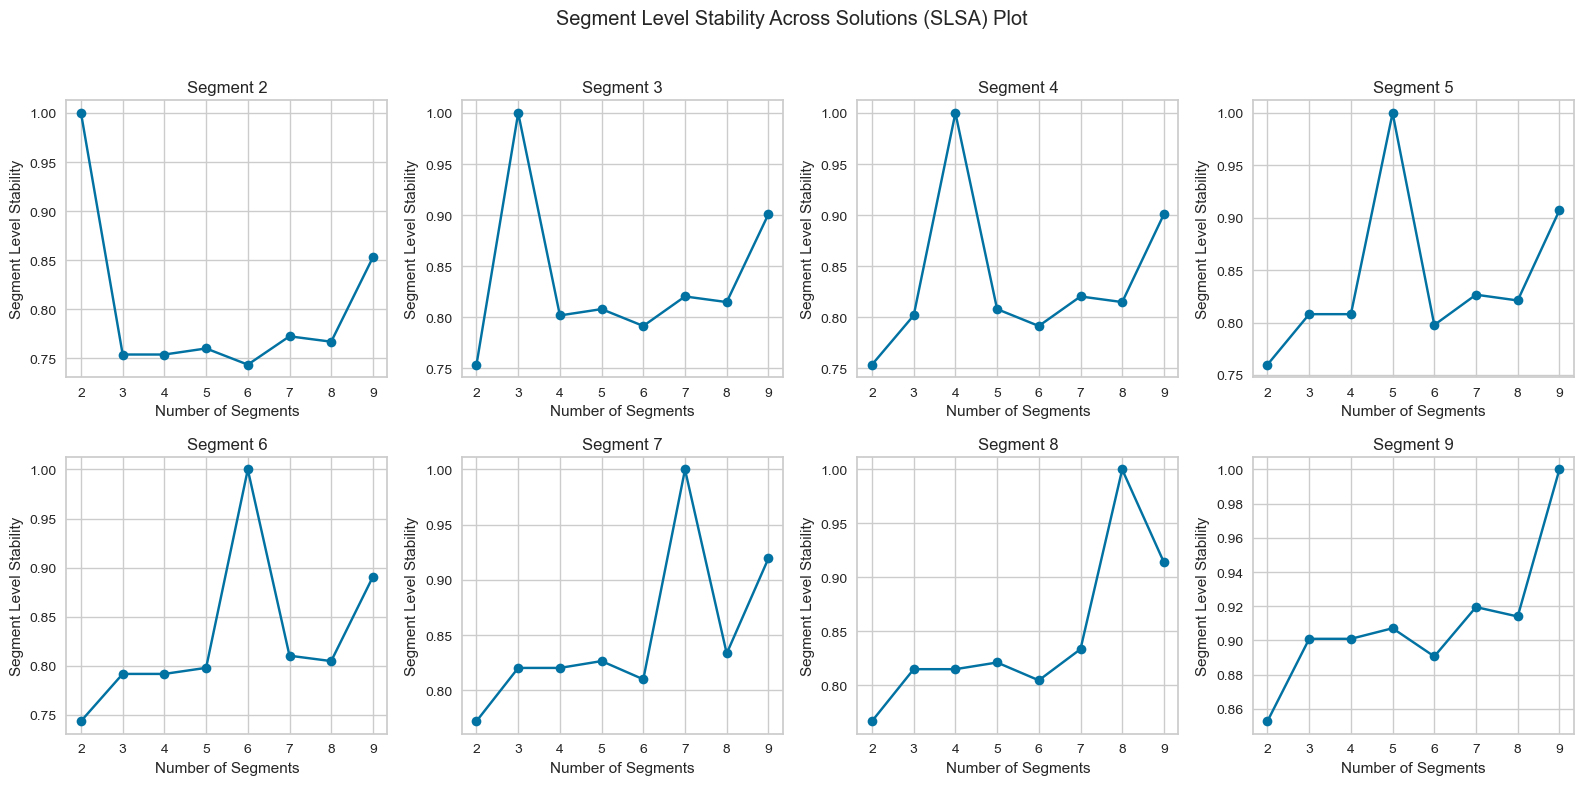

In [101]:

kmeans = KMeans(n_clusters=9, n_init=10, random_state=1234)
MD_km28 = kmeans.fit_predict(MD_x)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Segment Level Stability Across Solutions (SLSA) Plot')

num_segments = range(2, 10)

segment_stability = []
for segment in range(2, 10):
    labels_segment = MD_km28 == segment
    segment_stability.append(labels_segment)

for i, segment in enumerate(range(2, 10)):
    stability_values = [np.mean(segment_stability[segment - 2] == labels) for labels in segment_stability]
    
    # Check if the segment is empty
    if all(value == 0 for value in stability_values):
        axs[i // 4, i % 4].text(0.5, 0.5, 'Empty Segment', ha='center', va='center', fontsize=10, color='gray')
        axs[i // 4, i % 4].axis('off')
    else:
        axs[i // 4, i % 4].plot(num_segments, stability_values, marker='o', label=f'Segment {segment}')
        axs[i // 4, i % 4].set_xlabel('Number of Segments')
        axs[i // 4, i % 4].set_ylabel('Segment Level Stability')
        axs[i // 4, i % 4].set_title(f'Segment {segment}')
        axs[i // 4, i % 4].set_xticks(num_segments)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

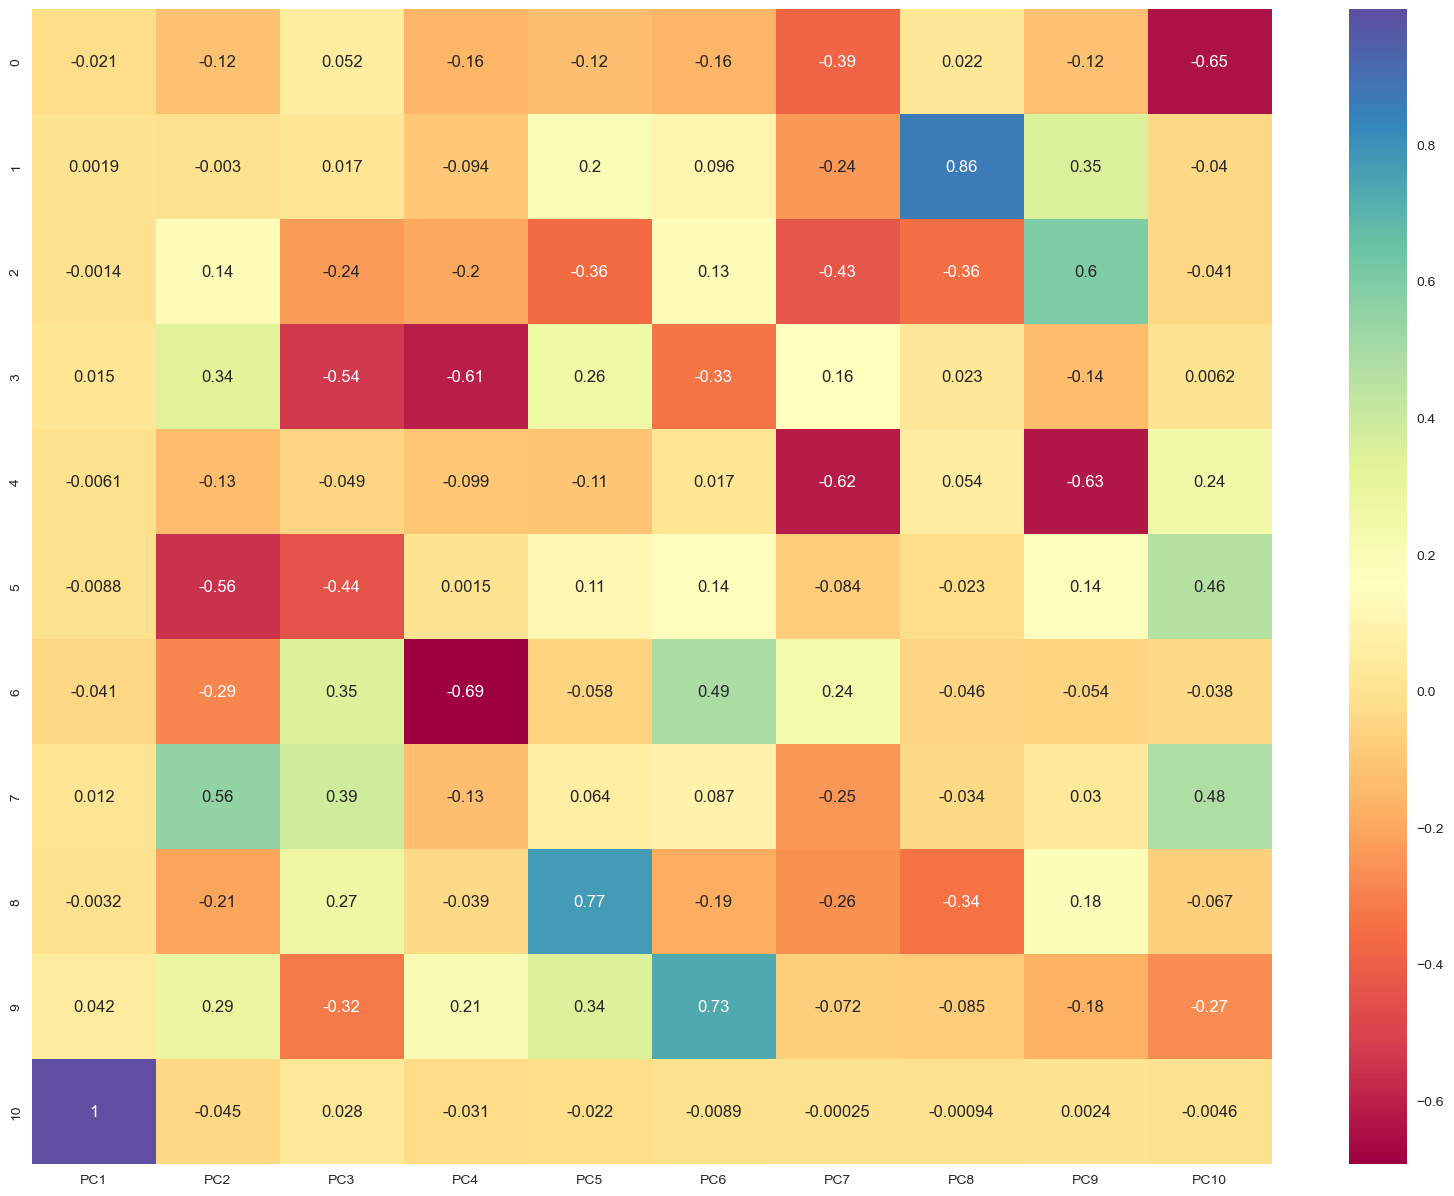

In [114]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

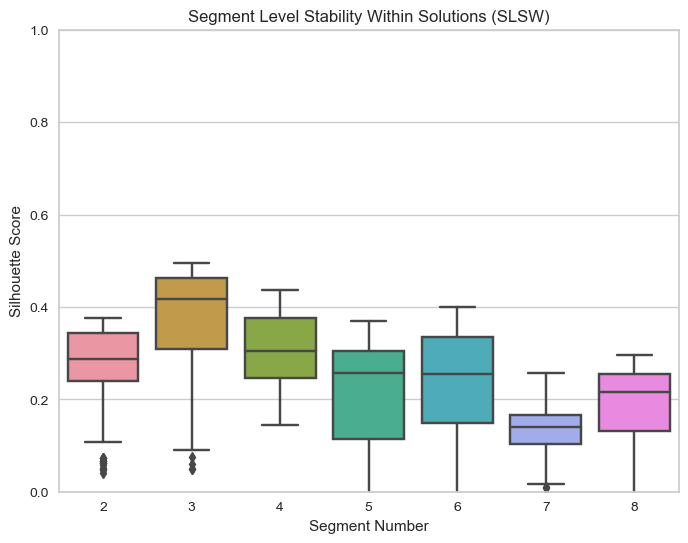

In [118]:
# Calculate silhouette scores for each data point
silhouette_scores = silhouette_samples(MD_x, MD_km28, metric='euclidean')
data = {'Segment': MD_km28, 'Silhouette Score': silhouette_scores}
df_silhouette = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Silhouette Score', data=df_silhouette, order=range(2, 9))  # Set the x-axis order
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.xlabel('Segment Number')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.show()

In [119]:
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(like_counts)

I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [120]:
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Display the frequency table for the new column
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index(ascending=True)
print(like_n_counts)

2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like_n, dtype: int64


In [121]:
import statsmodels.formula.api as smf

# Manually create a formula
formula_manual = 'Like_n ~ Var1 + Var2 + Var3 + Var4 + Var5 + Var6 + Var7 + Var8 + Var9 + Var10 + Var11'

# Automate the process
formula_automated = 'Like_n ~ ' + ' + '.join(mcdonalds.columns[1:12])
formula_automated = smf.ols(formula_automated, data=mcdonalds).fit()
print(formula_automated.model.formula)

Like_n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like


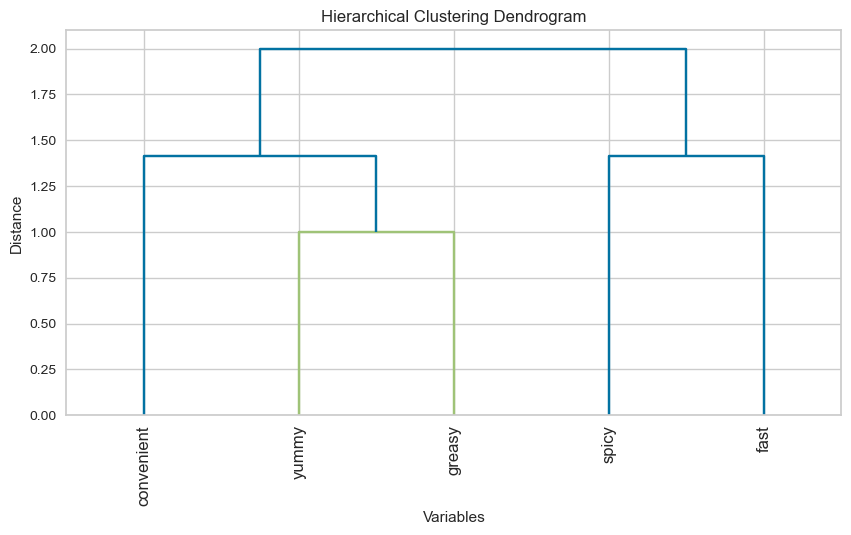

In [125]:
binary_matrix_data = np.array([[1, 0, 1, 0, 1],
                               [0, 1, 1, 0, 0],
                               [1, 1, 0, 1, 1],
                               [0, 0, 1, 0, 1]])

variable_names = ['yummy', 'convenient', 'spicy', 'greasy', 'fast']
MD_x = pd.DataFrame(binary_matrix_data, columns=variable_names)

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

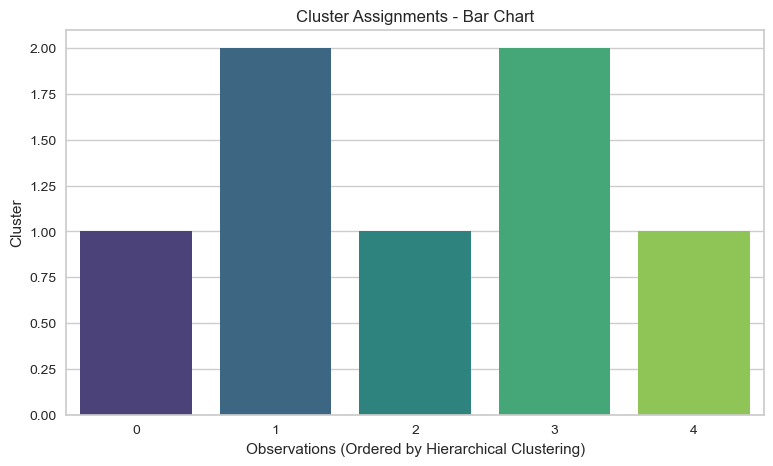

In [126]:
MD_k4 = np.array([1, 2, 1, 2, 1])
MD_vclust_order = np.arange(len(MD_k4))

cluster_data = pd.DataFrame({'Cluster': MD_k4, 'Order': MD_vclust_order})

# Sort the DataFrame based on hierarchical clustering order
cluster_data_sorted = cluster_data.sort_values(by='Order', ascending=False)
plt.figure(figsize=(9, 5))
sns.barplot(x='Order', y='Cluster', data=cluster_data_sorted, palette='viridis', ci=None)
plt.title('Cluster Assignments - Bar Chart')
plt.xlabel('Observations (Ordered by Hierarchical Clustering)')
plt.ylabel('Cluster')
plt.show()

<Figure size 800x600 with 0 Axes>

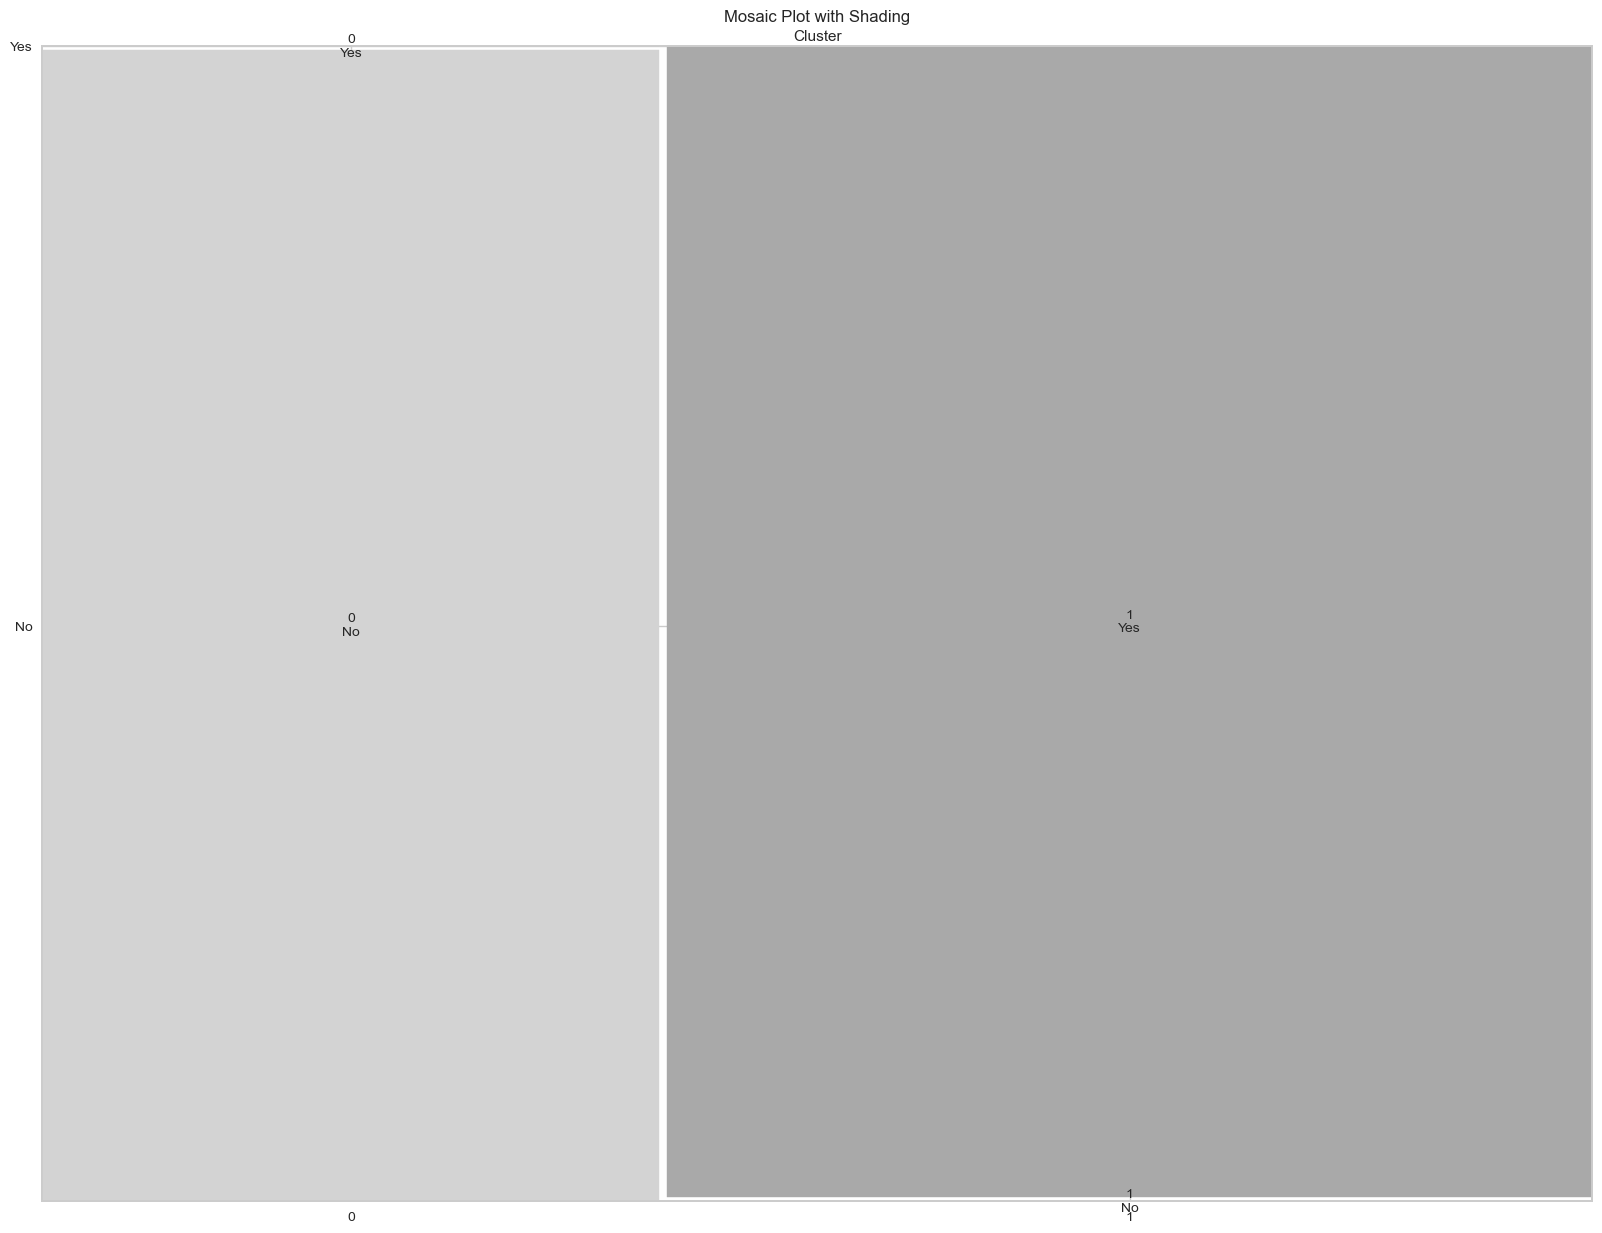

In [130]:
k4 = np.array([1, 0, 1, 0, 1])
mcdonalds = pd.DataFrame({'Like': ['Yes', 'No', 'Yes', 'No', 'Yes']})

cluster_data_like = pd.DataFrame({'Cluster': k4, 'Like': mcdonalds['Like']})
mosaic_data = pd.crosstab(cluster_data_like['Cluster'], cluster_data_like['Like'])
plt.figure(figsize=(8, 6))
mosaic(mosaic_data.stack(), properties=lambda key: {'color': 'lightgrey' if key[1] == 'No' else 'darkgrey'})
plt.title('Mosaic Plot with Shading')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<Figure size 800x600 with 0 Axes>

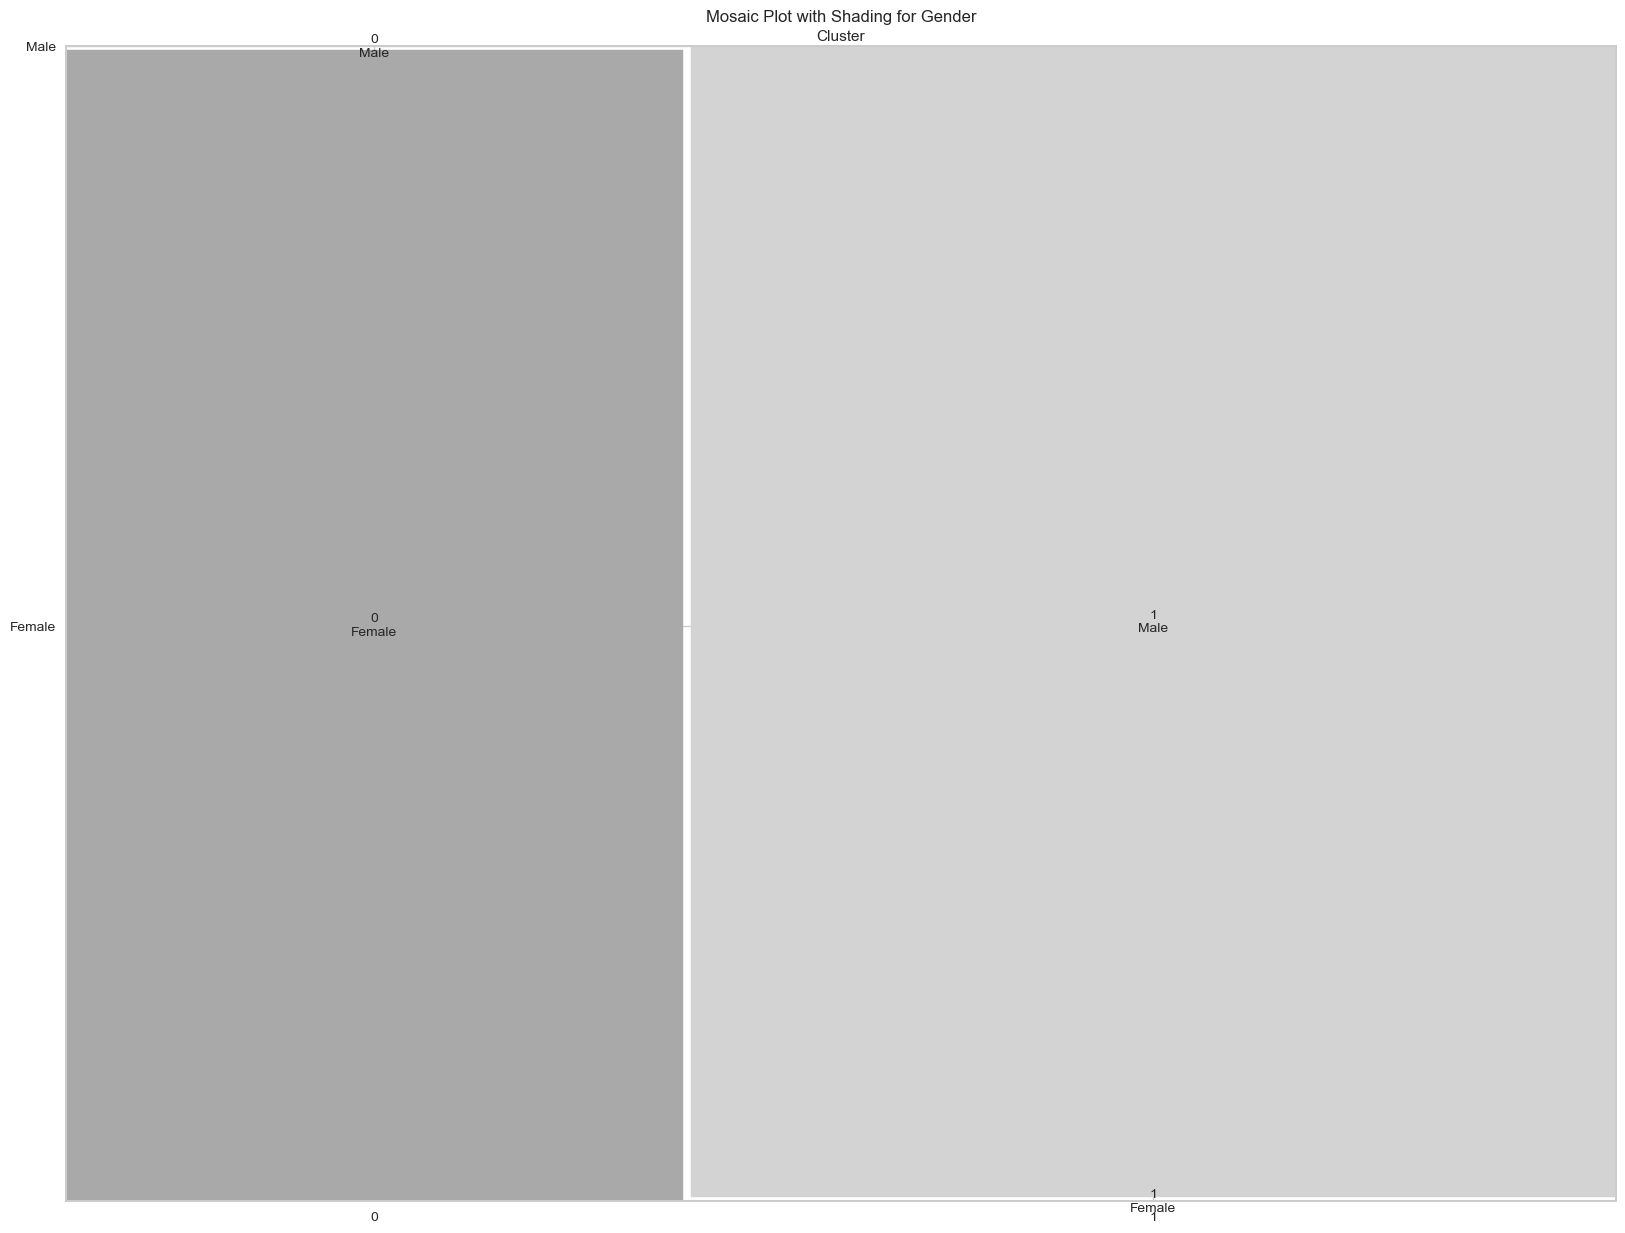

In [131]:
k4 = np.array([1, 0, 1, 0, 1])
mcdonalds = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']})

cluster_data_gender = pd.DataFrame({'Cluster': k4, 'Gender': mcdonalds['Gender']})

mosaic_data = pd.crosstab(cluster_data_gender['Cluster'], cluster_data_gender['Gender'])
plt.figure(figsize=(8, 6))
mosaic(mosaic_data.stack(), properties=lambda key: {'color': 'lightgrey' if key[1] == 'Male' else 'darkgrey'})
plt.title('Mosaic Plot with Shading for Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [132]:
k4 = np.array([-2, -1, 0, 1, 2])
mcdonalds = pd.DataFrame({
    'Like.n': [5, 3, 4, 2, 5],
    'Age': [25, 30, 22, 35, 28],
    'VisitFrequency': [3, 5, 2, 4, 3],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']
})

visit_means = mcdonalds.groupby(k4)['VisitFrequency'].mean()

print(visit_means)

like_means = mcdonalds.groupby(k4)['Like.n'].mean()

print(like_means)
# Convert 'Gender' to binary (1 for Female, 0 for Male) and calculate mean for each cluster
female_means = mcdonalds['Gender'].eq('Female').astype(int).groupby(k4).mean()

print(female_means)

-2    3.0
-1    5.0
 0    2.0
 1    4.0
 2    3.0
Name: VisitFrequency, dtype: float64
-2    5.0
-1    3.0
 0    4.0
 1    2.0
 2    5.0
Name: Like.n, dtype: float64
-2    0.0
-1    1.0
 0    0.0
 1    1.0
 2    0.0
Name: Gender, dtype: float64


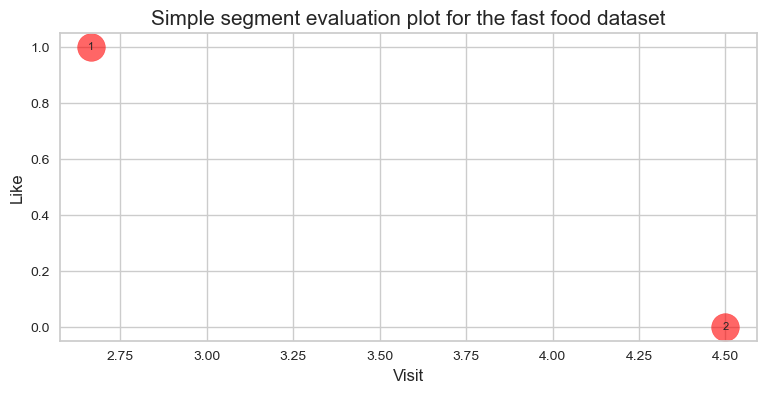

In [133]:
k4 = [-5, +5, -5, +5, -5]
mcdonalds = pd.DataFrame({'Like': ['Yes', 'No', 'Yes', 'No', 'Yes'],
                           'Gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
                           'VisitFrequency': [3, 4, 2, 5, 3]})

visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like'].apply(lambda x: (x == 'Yes').mean())
female_means = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())
visit_values = visit.values
like_values = like.values
female_values = female_means.values
plt.figure(figsize=(9, 4))
plt.scatter(visit_values, like_values, s=400, c='red', alpha=0.6)  # 's' is marker size
plt.title("Simple segment evaluation plot for the fast food dataset", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)

for i, txt in enumerate(range(1, len(visit_values) + 1)):
    plt.text(visit_values[i], like_values[i], str(txt), fontsize=8, ha='center', va='center')

plt.show()